# Oscillator grid demo

Make sure the package is installed with all of the requirements

In [1]:
!pip install -e .

Obtaining file:///D:/_Marci/Git/oscillatorgrid
  Attempting uninstall: oscillatorgrid
    Found existing installation: oscillatorgrid beta
    Uninstalling oscillatorgrid-beta:
      Successfully uninstalled oscillatorgrid-beta
  Running setup.py develop for oscillatorgrid


Display help

In [2]:
!python -m oscillatorgrid -h

usage: __main__.py [-h] [--show | --noshow] [-m GRID_LENGTH] [-f FREQUENCY]
                   [-lr LEARNING_RATE] [-dt TIMESTEP] [-n SIMULATION_STEPS]
                   [-s {parallel,permutation,random}] [-r SEED]

optional arguments:
  -h, --help            show this help message and exit

io:
  --show                Show results in an interactive manner
  --noshow              Just do the calculation without opening graphical
                        window

parameters:
  -m GRID_LENGTH, --grid_length GRID_LENGTH
                        Side length of the oscillator grid
  -f FREQUENCY, --frequency FREQUENCY
                        Frequency of the oscillator grid
  -lr LEARNING_RATE, --learning_rate LEARNING_RATE
                        Learning rate that influences how fast oscillators
                        adjust phase
  -dt TIMESTEP, --timestep TIMESTEP
                        Time step of the simulation
  -n SIMULATION_STEPS, --simulation_steps SIMULATION_STEPS
              

In [3]:
%matplotlib notebook

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
import numpy as np
from oscillatorgrid.grid import Grid, PhaseInteraction, simulate
from oscillatorgrid.figures import animation1, figure2, figure3, update3, figure4, update4, plt

Feel free to use the builtin help

In [6]:
help(Grid)

Help on class Grid in module oscillatorgrid.grid:

class Grid(GridBase, FloatOscillator)
 |  Grid(m, frequency, learning_rate, interaction=None)
 |  
 |  Implement a `m * m` grid of oscillators cells that have:
 |  - the same frequency,
 |  - the same amplitude,
 |  - variable phase.
 |  The update rule is that the each node adjusts its neighbors to be closer to them
 |  (this is rather "opinion propagation" instead of "adaptation").
 |  There are several alternatives for update scheduling.
 |  
 |  Parameters
 |  ----------
 |  m: int
 |      side length of the grid
 |  frequency: float
 |      frequency of oscillation
 |  learning_rate: float
 |      speed of adaptation applied on neighbors
 |  
 |  Attributes
 |  ----------
 |  d: int
 |      dimension of the grid
 |  coordinates_ : np.ndarray
 |      coordinates of the grid points, shape (m, ) * d + (d, ), e.g., (m, m, d)
 |  bulk_coordinates_ : np.ndarray
 |      coordinates of the non-border grid points, shape (m-2, ) * d + (d, )

In [7]:
help(simulate)

Help on function simulate in module oscillatorgrid.grid:

simulate(my_grid, dt=0.002, n=400, schedule='parallel', random_state=None)
    Run the simulation
    
    Parameters
    ----------
    my_grid: Grid
        A Grid instance, see parameters there
    dt: float
        Time step of the simulation
    n: int
        Number of time steps in the simulation
    schedule: str
        Schedule for updating phase with respect to neighbors.
        Must be one of: 'parallel', 'permutation', 'random'.
    random_state: np.random.RandomState | int
        Random state or seed



### Run simulation

In [8]:
my_grid = Grid(m=16,  # grid_length,
               frequency=0,
               learning_rate=0.02,
               interaction=PhaseInteraction(potential=2, symmetry=1, representation='float'))
result = simulate(my_grid,
                  dt=0.002,
                  n=500,
                  schedule='permutation',
                  random_state=317)

### Produce Figure 1

* this is an animated figure
* oscillator cells start from a random state and get synchronized over time

In [9]:
# Note: we must hold the reference anim to keep the animation going
# To plot in a single figure, uncomment:
# fig, ax = plt.subplots(2, 2, figsize=(10, 10))
anim = animation1(result)  # ax=ax[0, 0])

<IPython.core.display.Javascript object>

### Produce Figure 2

* line width may need to be updated to better percieve the snchronization of phases

In [8]:
figure2(result, unwrap=False, lw=0.5)  # ax=ax[0, 1])

<IPython.core.display.Javascript object>

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.collections.LineCollection at 0x288d9c64780>)

### Produce Figure 3

In [12]:
# ax[1, 0].remove()
fig3, ax3, sc3 = figure3(result, id=0, tau=20)  # fig=fig, axis_args=(2,2,3))
# Note: 3d update does not really work (I have a bug report on that)
# sl_id = widgets.IntSlider(min=0, max=my_grid.size-1, step=1, value=my_grid.size//2)
# sl_tau = widgets.IntSlider(min=1, max=100, step=1, value=10)
# interact(lambda id, tau: update3(sc3, result, id, tau), id=sl_id, tau=sl_tau)

<IPython.core.display.Javascript object>

### Produce Figure 4

* this is an interactive figure
* a point cloud parallel to the dashed line means correlation == 1

<IPython.core.display.Javascript object>


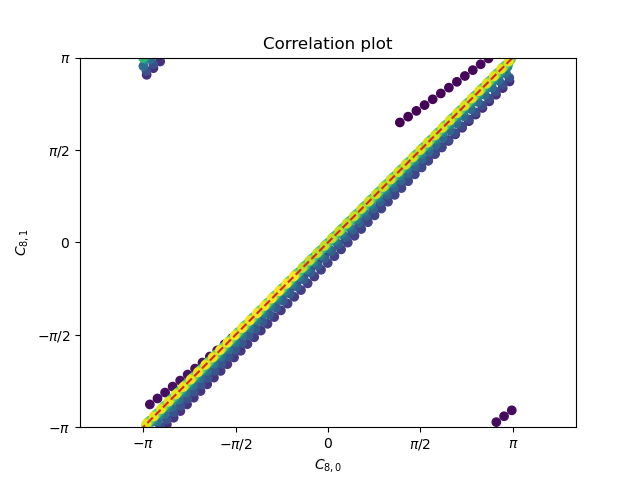

interactive(children=(IntSlider(value=128, description='id1', max=255), IntSlider(value=129, description='id2'…

<function __main__.<lambda>(id1, id2)>

In [10]:
fig4, ax4, sc4 = figure4(result, id1=0, id2=1)  # ax=ax[1, 1])
sl_id1 = widgets.IntSlider(min=0, max=my_grid.size-1, step=1, value=my_grid.size//2)
sl_id2 = widgets.IntSlider(min=0, max=my_grid.size-1, step=1, value=my_grid.size//2+1)
interact(lambda id1, id2: update4(sc4, result, id1, id2), id1=sl_id1, id2=sl_id2)